## 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [6]:
path = r'C:\Users\Yan Peng\LA Crimes'

In [7]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'crime_data_agg_ym.csv'),  index_col = 0)

In [8]:
df.shape

(1029, 8)

In [9]:
df.head()

,year_month,area_name,VEHICLE - STOLEN,BATTERY - SIMPLE ASSAULT,THEFT OF IDENTITY,BURGLARY FROM VEHICLE,BURGLARY,area_crime_rate
0,2020-01,77TH STREET,123,94,70,75,50,High crime rate
1,2020-01,CENTRAL,45,172,30,144,23,High crime rate
2,2020-01,DEVONSHIRE,40,53,51,67,54,Low crime rate
3,2020-01,FOOTHILL,69,51,45,37,35,Low crime rate
4,2020-01,HARBOR,77,49,25,29,42,Medium crime rate


## 2. Consistency check and formulating hypothesis

### Extreme values checks

C:\Users\Yan Peng\AppData\Local\Temp\ipykernel_11252\1413702298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BURGLARY FROM VEHICLE'], bins=25)
C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BURGLARY FROM VEHICLE', ylabel='Density'>

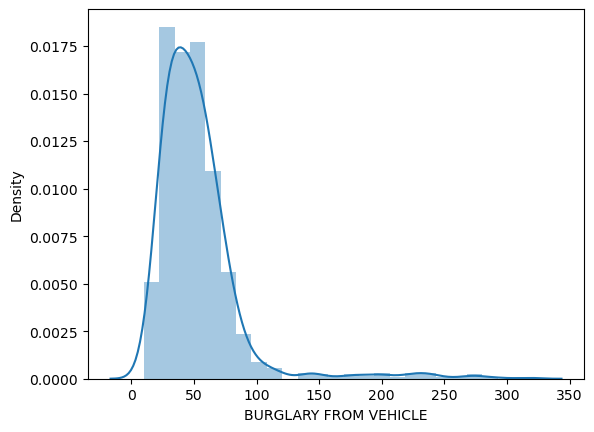

In [10]:
sns.distplot(df['BURGLARY FROM VEHICLE'], bins=25)

In [11]:
df['BURGLARY FROM VEHICLE'].value_counts().sort_index()

BURGLARY FROM VEHICLE
10     1
11     1
12     1
13     3
14     2
      ..
272    1
275    1
278    1
292    1
317    1
Name: count, Length: 127, dtype: int64

#### The extreme values on the right should be excluded.

In [12]:
# Filter out extreme values
df2 = df[df['BURGLARY FROM VEHICLE'] <= 120]

C:\Users\Yan Peng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


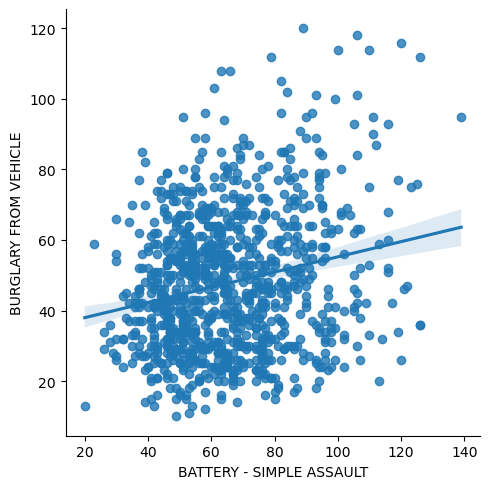

In [26]:
# Create a scatterplot for the crime types Vehicle-Stolen and Battery-Simple Assault in seaborn
sns.lmplot(x = 'BATTERY - SIMPLE ASSAULT', y = 'BURGLARY FROM VEHICLE', data = df2)

### Hypothesis: The frequency of Burglary from Vehicle increases with the rise of Simple Assaults in any area.

## 3. Regression analysis

### Data prep

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['BATTERY - SIMPLE ASSAULT'].values.reshape(-1,1)
y = df2['BURGLARY FROM VEHICLE'].values.reshape(-1,1)

In [ ]:
X

In [ ]:
y

In [17]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Analysis

In [18]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

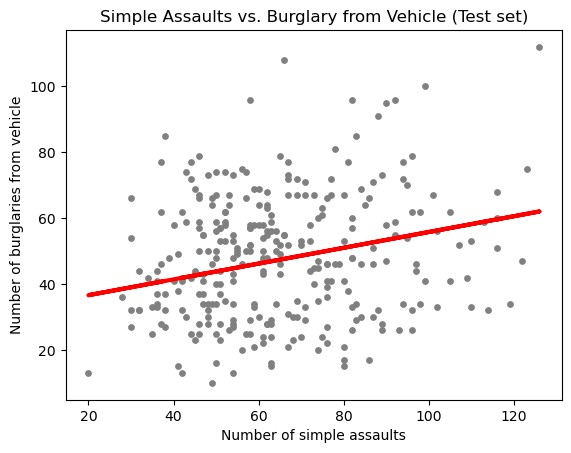

In [21]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Simple Assaults vs. Burglary from Vehicle (Test set)')
plot_test.xlabel('Number of simple assaults')
plot_test.ylabel('Number of burglaries from vehicle')
plot_test.show()

#### Many data points are not positioned around the line.

In [22]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [23]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.23964614]]
Mean squared error:  340.5454641474134
R2 score:  0.026916305366804116


#### The mean squared error is extremely large and the R2 score is quite low, both indicating poor performance of the model.

In [ ]:
y_predicted

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,42,41.906605
1,66,42.865189
2,73,47.897758
3,49,41.666958
4,61,46.939174
5,30,46.220235
6,56,46.939174
7,34,54.368204
8,56,46.699527
9,41,40.468728


#### The predicted values are very different from the actual values.

### Conclusion: The linear regression shows that the occurrence of simple assault only contributes to about 3% of the trend in the data (cf. R2 score). However, as concluded in Chapter 6.2, the crime rate of an area can impact the co-occurrence of the two crimes.